# Data Analysis - Project 1

---

## Code to analyze data generated on hurricane landfalls and local economic data

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import hvplot.pandas
from scipy.stats import linregress
from bokeh.resources import INLINE


### Upload Newly Created Datasets to Notebook

In [2]:
# Upload formatted landfall dataset 
formatted_landfall_df = pd.read_csv("Resources/formatted_landfall.csv")

# Upload formatted merged costliness and economic dataset
costliness_bea_hpi_df = pd.read_csv('Output_CSVs/costliness_bea_hpi_data.csv')
# Drop duplicates 
costliness_bea_hpi_df = costliness_bea_hpi_df.drop_duplicates(subset=['Storm Name','County'])

### Create a chart to analyze where locations make landfall

In [3]:
# Use hvpolt to make and format a map using landflaa coordiantes
lanfall_map = formatted_landfall_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Category at Landfall",
    color = "Category at Landfall",
    title = 'US Hurricane Landfalls by Category at Landfall (1980-2023)',
    hover_cols=['Storm Name','Year','County'],
    scale = 5,
    coastline = '110m'
)

#Save the figure
hvplot.save(lanfall_map, 'Output_Data_Charts/landfall_map.png', resources=INLINE)

#Display the figure
lanfall_map

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (Category at Landfall,Storm Name,Year,County)
   .Coastline.I :Feature   [Longitude,Latitude]

### Create a pie chart to show what states get hit the most frequently

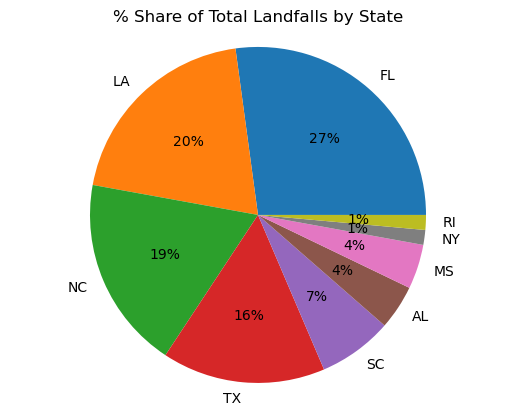

In [4]:
# Create a new dataframe the isolates unique landfalls by name and state to filter out multiple landfalls in the same state by the same storm 
unique_storm_df = formatted_landfall_df.drop_duplicates(subset=['Storm Name','State'])
state_counts = unique_storm_df.value_counts("State")

# Create a pie chart to show the percent share each state has 
landfall_pie = state_counts.plot.pie(y='% Share of Total Landfalls by State',autopct="%1.0f%%",title=('% Share of Total Landfalls by State'))

# Format the chart to be more presentable
landfall_pie.set_ylabel('')
plt.axis("equal")

# Save the figure
plt.savefig('Output_Data_Charts/state_pie.png')

# Show the pie chart
plt.show()

### Create a line chart to analyze change in HPI in counties struck by hurricanes

-----------------------------------------------------------------
Mean HPI Change by County
    Year -1:    6.24
    Year of:    8.85
    Year +1:    10.72
    Year +2:    5.25
    Year +3:    0.47
-----------------------------------------------------------------
Mean HPI Change by State
    Year -1:    4.97
    Year of:    7.28
    Year +1:    7.93
    Year +2:    4.88
    Year +3:    2.19
-----------------------------------------------------------------
Mean HPI Change by Nation
    Year -1:    3.31
    Year of:    4.5
    Year +1:    4.86
    Year +2:    4.2
    Year +3:    3.34


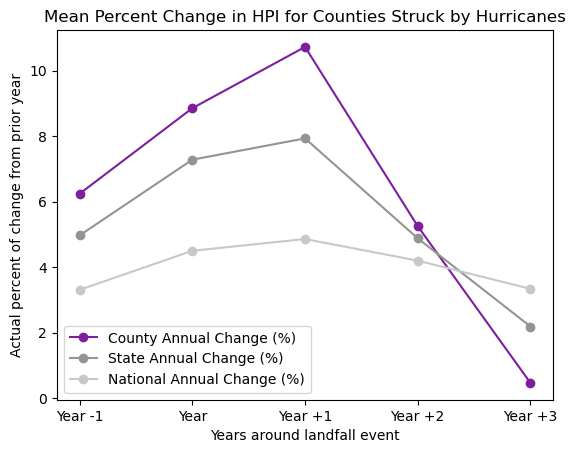

In [5]:
# Calculate mean annual HPI change for counties affect by hurricanes
prev_hpi_ac_mean = costliness_bea_hpi_df['Annual HPI Change (%) -1'].mean().round(2)
hpi_ac_mean = costliness_bea_hpi_df['Annual HPI Change (%)'].mean().round(2)
hpi_ac1_mean = costliness_bea_hpi_df['Annual HPI Change (%) +1'].mean().round(2)
hpi_ac2_mean = costliness_bea_hpi_df['Annual HPI Change (%) +2'].mean().round(2)
hpi_ac3_mean = costliness_bea_hpi_df['Annual HPI Change (%) +3'].mean().round(2)

# Calculate mean annual HPI change for the whole state
state_prev_hpi_ac_mean = costliness_bea_hpi_df['State HPI AC Mean -1'].mean().round(2)
state_hpi_ac_mean = costliness_bea_hpi_df['State HPI AC Mean'].mean().round(2)
state_hpi_ac1_mean = costliness_bea_hpi_df['State HPI AC Mean +1'].mean().round(2)
state_hpi_ac2_mean = costliness_bea_hpi_df['State HPI AC Mean +2'].mean().round(2)
state_hpi_ac3_mean = costliness_bea_hpi_df['State HPI AC Mean +3'].mean().round(2)

# Calculate mean annual HPI change for the whole nation
nat_prev_hpi_ac_mean = costliness_bea_hpi_df['National HPI AC Mean -1'].mean().round(2)
nat_hpi_ac_mean = costliness_bea_hpi_df['National HPI AC Mean'].mean().round(2)
nat_hpi_ac1_mean = costliness_bea_hpi_df['National HPI AC Mean +1'].mean().round(2)
nat_hpi_ac2_mean = costliness_bea_hpi_df['National HPI AC Mean +2'].mean().round(2)
nat_hpi_ac3_mean = costliness_bea_hpi_df['National HPI AC Mean +3'].mean().round(2)

# Print results
print('-----------------------------------------------------------------')
print('Mean HPI Change by County')
print(f'    Year -1:    {prev_hpi_ac_mean}')
print(f'    Year of:    {hpi_ac_mean}')
print(f'    Year +1:    {hpi_ac1_mean}')
print(f'    Year +2:    {hpi_ac2_mean}')
print(f'    Year +3:    {hpi_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by State')
print(f'    Year -1:    {state_prev_hpi_ac_mean}')
print(f'    Year of:    {state_hpi_ac_mean}')
print(f'    Year +1:    {state_hpi_ac1_mean}')
print(f'    Year +2:    {state_hpi_ac2_mean}')
print(f'    Year +3:    {state_hpi_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by Nation')
print(f'    Year -1:    {nat_prev_hpi_ac_mean}')
print(f'    Year of:    {nat_hpi_ac_mean}')
print(f'    Year +1:    {nat_hpi_ac1_mean}')
print(f'    Year +2:    {nat_hpi_ac2_mean}')
print(f'    Year +3:    {nat_hpi_ac3_mean}')

# Create a list for the lines in the graph below
lines = ['Year -1','Year','Year +1','Year +2','Year +3']

# Create lists to store the data created above
acs = [prev_hpi_ac_mean,hpi_ac_mean,hpi_ac1_mean,hpi_ac2_mean,hpi_ac3_mean]
state_acs = [state_prev_hpi_ac_mean,state_hpi_ac_mean,state_hpi_ac1_mean,state_hpi_ac2_mean,state_hpi_ac3_mean]
nat_acs = [nat_prev_hpi_ac_mean,nat_hpi_ac_mean,nat_hpi_ac1_mean,nat_hpi_ac2_mean,nat_hpi_ac3_mean]

# Plot a line chart for the data above
x_axis = np.arange(len(lines)) 
plt.plot(x_axis, acs, color='#7E1E9C',marker='o',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs, color='#929591',marker='o',label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7',marker='o',label = 'National Annual Change (%)') 

# Format the line chart
plt.xticks(x_axis, lines) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Actual percent of change from prior year") 
plt.title("Mean Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/HPI_line.png')

# Display the chart
plt.show() 


### Create a bar chart to analyze the difference in change between counties and state, and counties and nation for HPI

-----------------------------------------------------------------
Difference in Mean HPI Change between County and State
    Year of:    0.3
    Year +1:    1.52
    Year +2:    -0.9
    Year +3:    -2.99
-----------------------------------------------------------------
Difference in Mean HPI Change between County and Nation
    Year of:    1.42
    Year +1:    2.93
    Year +2:    -1.88
    Year +3:    -5.8
-----------------------------------------------------------------


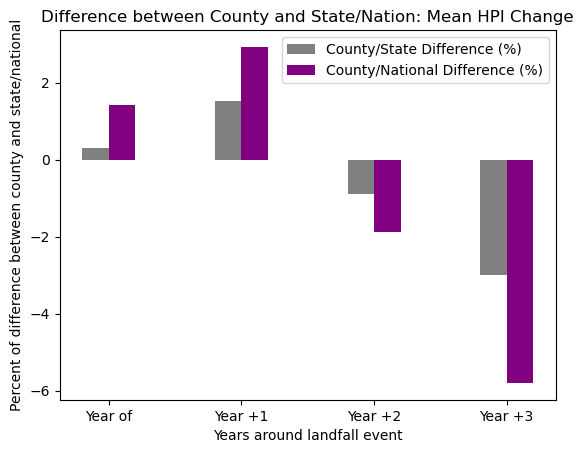

In [6]:
# Calculate the difference in the 'Year -1' for state and county
prev_state_hpi_dif = (prev_hpi_ac_mean-state_prev_hpi_ac_mean).round(2)

# Subtract these values from the 'prev_state_hpi_dif' above to caluclate the difference in change
state_hpi_dif = ((hpi_ac_mean-state_hpi_ac_mean)-prev_state_hpi_dif).round(2)
state_hpi_dif1 = ((hpi_ac1_mean-state_hpi_ac1_mean)-prev_state_hpi_dif).round(2)
state_hpi_dif2 = ((hpi_ac2_mean-state_hpi_ac2_mean)-prev_state_hpi_dif).round(2)
state_hpi_dif3 = ((hpi_ac3_mean-state_hpi_ac3_mean)-prev_state_hpi_dif).round(2)

# Calculate the difference in the 'Year -1' for nation and county
prev_nat_hpi_dif = (prev_hpi_ac_mean-nat_prev_hpi_ac_mean).round(2)

# Subtract these values from the 'prev_nat_hpi_dif' above to caluclate the difference in change
nat_hpi_dif = ((hpi_ac_mean-nat_hpi_ac_mean)-prev_nat_hpi_dif).round(2)
nat_hpi_dif1 = ((hpi_ac1_mean-nat_hpi_ac1_mean)-prev_nat_hpi_dif).round(2)
nat_hpi_dif2 = ((hpi_ac2_mean-nat_hpi_ac2_mean)-prev_nat_hpi_dif).round(2)
nat_hpi_dif3 = ((hpi_ac3_mean-nat_hpi_ac3_mean)-prev_nat_hpi_dif).round(2)

# Print the results
print('-----------------------------------------------------------------')
print('Difference in Mean HPI Change between County and State')
print(f'    Year of:    {state_hpi_dif}')
print(f'    Year +1:    {state_hpi_dif1}')
print(f'    Year +2:    {state_hpi_dif2}')
print(f'    Year +3:    {state_hpi_dif3}')
print('-----------------------------------------------------------------')
print('Difference in Mean HPI Change between County and Nation')
print(f'    Year of:    {nat_hpi_dif}')
print(f'    Year +1:    {nat_hpi_dif1}')
print(f'    Year +2:    {nat_hpi_dif2}')
print(f'    Year +3:    {nat_hpi_dif3}')
print('-----------------------------------------------------------------')

# Create a list for the bars in the graph below
bars = ['Year of','Year +1','Year +2','Year +3']

# Create lists to store the data created above
state_hpi_difs = [state_hpi_dif,state_hpi_dif1,state_hpi_dif2,state_hpi_dif3]
nat_hpi_difs = [nat_hpi_dif,nat_hpi_dif1,nat_hpi_dif2,nat_hpi_dif3]

# Plot a bar chart for the data above
x_axis = np.arange(len(bars))   
plt.bar(x_axis - 0.1, state_hpi_difs, 0.2, color='gray',label = 'County/State Difference (%)') 
plt.bar(x_axis + 0.1, nat_hpi_difs, 0.2, color='purple',label = 'County/National Difference (%)') 

# Format the bar chart
plt.xticks(x_axis, bars) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Percent of difference between county and state/national") 
plt.title("Difference between County and State/Nation: Mean HPI Change") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/HPI_bar.png')

# Display the chart
plt.show() 

### Create a line chart to analyze change in income for counties struck by hurricanes

-----------------------------------------------------------------
Mean Income Change by County
    Year -1:    5.9
    Year of:    7.74
    Year +1:    5.98
    Year +2:    7.58
    Year +3:    4.78
-----------------------------------------------------------------
Mean Income Change by State
    Year -1:    5.59
    Year of:    6.64
    Year +1:    5.54
    Year +2:    5.84
    Year +3:    5.44
-----------------------------------------------------------------
Mean Income Change by Nation
    Year -1:    4.98
    Year of:    5.21
    Year +1:    4.45
    Year +2:    5.33
    Year +3:    5.33


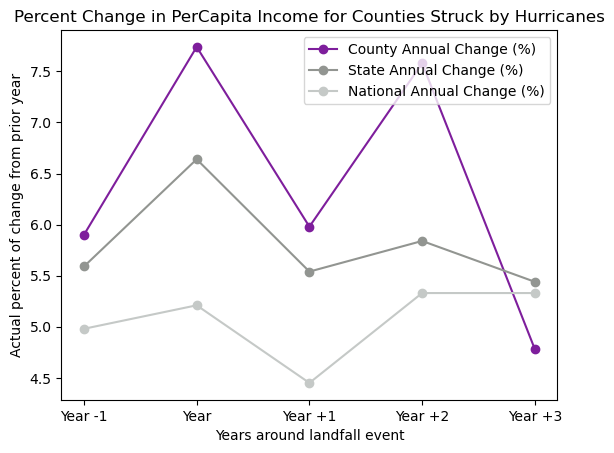

In [7]:
#Calculate mean annual income change for counties affect by hurricanes
prev_income_ac_mean = costliness_bea_hpi_df['Annual Income Change (%) -1'].mean().round(2)
income_ac_mean = costliness_bea_hpi_df['Annual Income Change (%)'].mean().round(2)
income_ac1_mean = costliness_bea_hpi_df['Annual Income Change (%) +1'].mean().round(2)
income_ac2_mean = costliness_bea_hpi_df['Annual Income Change (%) +2'].mean().round(2)
income_ac3_mean = costliness_bea_hpi_df['Annual Income Change (%) +3'].mean().round(2)

#Calculate mean annual income change for the whole state
state_prev_income_ac_mean = costliness_bea_hpi_df['State Income AC Mean -1'].mean().round(2)
state_income_ac_mean = costliness_bea_hpi_df['State Income AC Mean'].mean().round(2)
state_income_ac1_mean = costliness_bea_hpi_df['State Income AC Mean +1'].mean().round(2)
state_income_ac2_mean = costliness_bea_hpi_df['State Income AC Mean +2'].mean().round(2)
state_income_ac3_mean = costliness_bea_hpi_df['State Income AC Mean +3'].mean().round(2)

#Calculate mean annual income change for the whole nation
nat_prev_income_ac_mean = costliness_bea_hpi_df['National Income AC Mean -1'].mean().round(2)
nat_income_ac_mean = costliness_bea_hpi_df['National Income AC Mean'].mean().round(2)
nat_income_ac1_mean = costliness_bea_hpi_df['National Income AC Mean +1'].mean().round(2)
nat_income_ac2_mean = costliness_bea_hpi_df['National Income AC Mean +2'].mean().round(2)
nat_income_ac3_mean = costliness_bea_hpi_df['National Income AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean Income Change by County')
print(f'    Year -1:    {prev_income_ac_mean}')
print(f'    Year of:    {income_ac_mean}')
print(f'    Year +1:    {income_ac1_mean}')
print(f'    Year +2:    {income_ac2_mean}')
print(f'    Year +3:    {income_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Income Change by State')
print(f'    Year -1:    {state_prev_income_ac_mean}')
print(f'    Year of:    {state_income_ac_mean}')
print(f'    Year +1:    {state_income_ac1_mean}')
print(f'    Year +2:    {state_income_ac2_mean}')
print(f'    Year +3:    {state_income_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Income Change by Nation')
print(f'    Year -1:    {nat_prev_income_ac_mean}')
print(f'    Year of:    {nat_income_ac_mean}')
print(f'    Year +1:    {nat_income_ac1_mean}')
print(f'    Year +2:    {nat_income_ac2_mean}')
print(f'    Year +3:    {nat_income_ac3_mean}')

# Create a list for the lines in the graph below
lines = ['Year -1','Year','Year +1','Year +2','Year +3']

# Create lists to store the data created above
acs = [prev_income_ac_mean,income_ac_mean,income_ac1_mean,income_ac2_mean,income_ac3_mean]
state_acs = [state_prev_income_ac_mean,state_income_ac_mean,state_income_ac1_mean,state_income_ac2_mean,state_income_ac3_mean]
nat_acs = [nat_prev_income_ac_mean,nat_income_ac_mean,nat_income_ac1_mean,nat_income_ac2_mean,nat_income_ac3_mean]

# Plot a line chart for the data above
x_axis = np.arange(len(lines)) 
plt.plot(x_axis, acs, color='#7E1E9C',marker='o',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs,color='#929591',marker='o',label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7',marker='o',label = 'National Annual Change (%)') 

# Format the line chart
plt.xticks(x_axis, lines) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Actual percent of change from prior year") 
plt.title("Percent Change in PerCapita Income for Counties Struck by Hurricanes") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/income_line.png')

# Show the chart
plt.show() 

### Create a bar chart to analyze the difference in change between counties and state, and counties and nation for income

-----------------------------------------------------------------
Difference between County and State: Mean Income Change
    Year of:    0.79
    Year +1:    0.13
    Year +2:    1.43
    Year +3:    -0.97
-----------------------------------------------------------------
Difference between County and Nation: Mean Income Change
    Year of:    1.61
    Year +1:    0.61
    Year +2:    1.33
    Year +3:    -1.47
-----------------------------------------------------------------


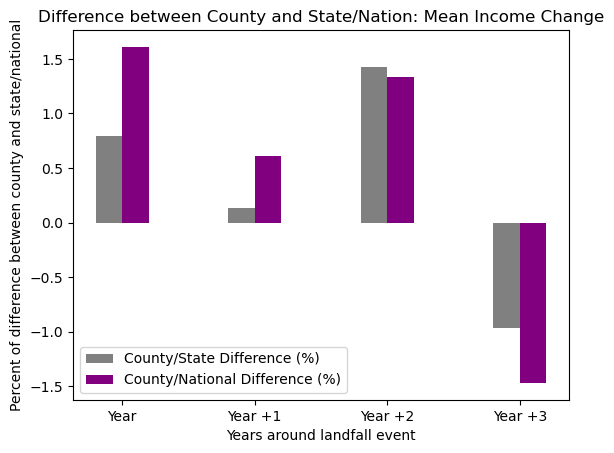

In [8]:
# Calculate the difference in the 'Year -1' for state and county
prev_state_income_dif = (prev_income_ac_mean-state_prev_income_ac_mean).round(2)

# Subtract these values from the 'prev_state_income_dif' above to caluclate the difference in change
state_income_dif = ((income_ac_mean-state_income_ac_mean)-prev_state_income_dif).round(2)
state_income_dif1 = ((income_ac1_mean-state_income_ac1_mean)-prev_state_income_dif).round(2)
state_income_dif2 = ((income_ac2_mean-state_income_ac2_mean)-prev_state_income_dif).round(2)
state_income_dif3 = ((income_ac3_mean-state_income_ac3_mean)-prev_state_income_dif).round(2)

# Calculate the difference in the 'Year -1' for nation and county
prev_nat_income_dif = (prev_income_ac_mean-nat_prev_income_ac_mean).round(2)

# Subtract these values from the 'prev_nat_income_dif' above to caluclate the difference in change
nat_income_dif = ((income_ac_mean-nat_income_ac_mean)-prev_nat_income_dif).round(2)
nat_income_dif1 = ((income_ac1_mean-nat_income_ac1_mean)-prev_nat_income_dif).round(2)
nat_income_dif2 = ((income_ac2_mean-nat_income_ac2_mean)-prev_nat_income_dif).round(2)
nat_income_dif3 = ((income_ac3_mean-nat_income_ac3_mean)-prev_nat_income_dif).round(2)

# Print the results
print('-----------------------------------------------------------------')
print('Difference between County and State: Mean Income Change')
print(f'    Year of:    {state_income_dif}')
print(f'    Year +1:    {state_income_dif1}')
print(f'    Year +2:    {state_income_dif2}')
print(f'    Year +3:    {state_income_dif3}')
print('-----------------------------------------------------------------')
print('Difference between County and Nation: Mean Income Change')
print(f'    Year of:    {nat_income_dif}')
print(f'    Year +1:    {nat_income_dif1}')
print(f'    Year +2:    {nat_income_dif2}')
print(f'    Year +3:    {nat_income_dif3}')
print('-----------------------------------------------------------------')

# Create a list for the bars in the graph below
bars = ['Year','Year +1','Year +2','Year +3']

# Create lists to store the data created above
state_income_difs = [state_income_dif,state_income_dif1,state_income_dif2,state_income_dif3]
nat_income_difs = [nat_income_dif,nat_income_dif1,nat_income_dif2,nat_income_dif3]

# Plot a bar chart for the data above
x_axis = np.arange(len(bars)) 
plt.bar(x_axis - 0.1, state_income_difs, 0.2,color='gray', label = 'County/State Difference (%)') 
plt.bar(x_axis + 0.1, nat_income_difs, 0.2,color='purple', label = 'County/National Difference (%)') 

# Format the bar chart
plt.xticks(x_axis, bars) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Percent of difference between county and state/national") 
plt.title("Difference between County and State/Nation: Mean Income Change") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/income_bar.png')

# Display the chart
plt.show() 

### Create a line chart to analyze change in jobs in counties struck by hurricanes

-----------------------------------------------------------------
Mean Jobs Change by County
    Year -1:    2.02
    Year of:    1.94
    Year +1:    2.65
    Year +2:    2.57
    Year +3:    0.92
-----------------------------------------------------------------
Mean Jobs Change by State
    Year -1:    2.16
    Year of:    2.42
    Year +1:    2.45
    Year +2:    1.85
    Year +3:    0.97
-----------------------------------------------------------------
Mean Jobs Change by Nation
    Year -1:    1.19
    Year of:    1.36
    Year +1:    1.3
    Year +2:    1.11
    Year +3:    0.82


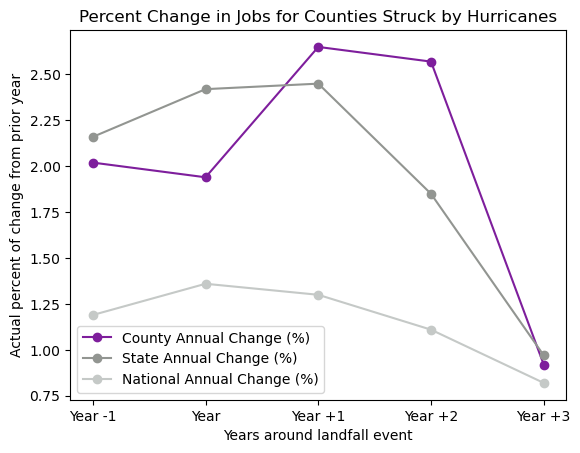

In [9]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_jobs_ac_mean = costliness_bea_hpi_df['Annual Jobs Change (%) -1'].mean().round(2)
jobs_ac_mean = costliness_bea_hpi_df['Annual Jobs Change (%)'].mean().round(2)
jobs_ac1_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +1'].mean().round(2)
jobs_ac2_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +2'].mean().round(2)
jobs_ac3_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +3'].mean().round(2)

#Calculate mean annual HPI change for the whole state
state_prev_jobs_ac_mean = costliness_bea_hpi_df['State Jobs AC Mean -1'].mean().round(2)
state_jobs_ac_mean = costliness_bea_hpi_df['State Jobs AC Mean'].mean().round(2)
state_jobs_ac1_mean = costliness_bea_hpi_df['State Jobs AC Mean +1'].mean().round(2)
state_jobs_ac2_mean = costliness_bea_hpi_df['State Jobs AC Mean +2'].mean().round(2)
state_jobs_ac3_mean = costliness_bea_hpi_df['State Jobs AC Mean +3'].mean().round(2)

#Calculate mean annual HPI change for the whole nation
nat_prev_jobs_ac_mean = costliness_bea_hpi_df['National Jobs AC Mean -1'].mean().round(2)
nat_jobs_ac_mean = costliness_bea_hpi_df['National Jobs AC Mean'].mean().round(2)
nat_jobs_ac1_mean = costliness_bea_hpi_df['National Jobs AC Mean +1'].mean().round(2)
nat_jobs_ac2_mean = costliness_bea_hpi_df['National Jobs AC Mean +2'].mean().round(2)
nat_jobs_ac3_mean = costliness_bea_hpi_df['National Jobs AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean Jobs Change by County')
print(f'    Year -1:    {prev_jobs_ac_mean}')
print(f'    Year of:    {jobs_ac_mean}')
print(f'    Year +1:    {jobs_ac1_mean}')
print(f'    Year +2:    {jobs_ac2_mean}')
print(f'    Year +3:    {jobs_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Jobs Change by State')
print(f'    Year -1:    {state_prev_jobs_ac_mean}')
print(f'    Year of:    {state_jobs_ac_mean}')
print(f'    Year +1:    {state_jobs_ac1_mean}')
print(f'    Year +2:    {state_jobs_ac2_mean}')
print(f'    Year +3:    {state_jobs_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Jobs Change by Nation')
print(f'    Year -1:    {nat_prev_jobs_ac_mean}')
print(f'    Year of:    {nat_jobs_ac_mean}')
print(f'    Year +1:    {nat_jobs_ac1_mean}')
print(f'    Year +2:    {nat_jobs_ac2_mean}')
print(f'    Year +3:    {nat_jobs_ac3_mean}')

# Create a list for the lines in the graph below
lines = ['Year -1','Year','Year +1','Year +2','Year +3']

# Create lists to store the data created above
acs = [prev_jobs_ac_mean,jobs_ac_mean,jobs_ac1_mean,jobs_ac2_mean,jobs_ac3_mean]
state_acs = [state_prev_jobs_ac_mean,state_jobs_ac_mean,state_jobs_ac1_mean,state_jobs_ac2_mean,state_jobs_ac3_mean]
nat_acs = [nat_prev_jobs_ac_mean,nat_jobs_ac_mean,nat_jobs_ac1_mean,nat_jobs_ac2_mean,nat_jobs_ac3_mean]

# Plot a line chart for the data above
x_axis = np.arange(len(lines)) 
plt.plot(x_axis, acs, color='#7E1E9C',marker='o',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs,color='#929591',marker='o',label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7',marker='o',label = 'National Annual Change (%)') 

# Format the line chart
plt.xticks(x_axis, lines) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Actual percent of change from prior year") 
plt.title("Percent Change in Jobs for Counties Struck by Hurricanes") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/jobs_line.png')

# Display the chart
plt.show() 

### Create a bar chart to analyze the difference in change between counties and state, and counties and nation for jobs

-----------------------------------------------------------------
Difference between County and State: Mean Jobs Change
    Year of:    -0.34
    Year +1:    0.34
    Year +2:    0.86
    Year +3:    0.09
-----------------------------------------------------------------
Difference between County and Nation: Mean Jobs Change
    Year of:    -0.25
    Year +1:    0.52
    Year +2:    0.63
    Year +3:    -0.73
-----------------------------------------------------------------


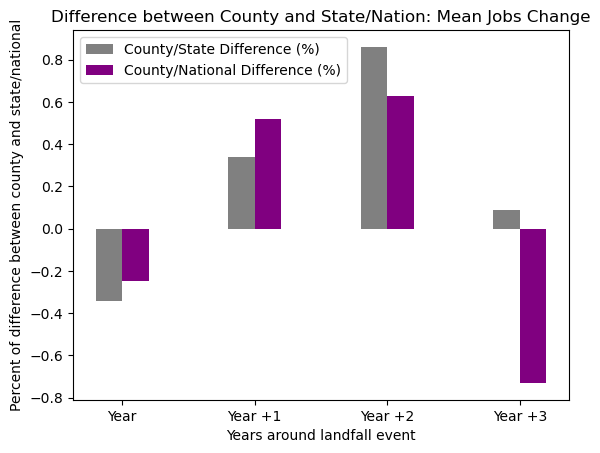

In [10]:
# Calculate the difference in the 'Year -1' for state and county
prev_state_jobs_dif = (prev_jobs_ac_mean-state_prev_jobs_ac_mean).round(2)

# Subtract these values from the 'prev_state_jobs_dif' above to caluclate the difference in change
state_jobs_dif = ((jobs_ac_mean-state_jobs_ac_mean)-prev_state_jobs_dif).round(2)
state_jobs_dif1 = ((jobs_ac1_mean-state_jobs_ac1_mean)-prev_state_jobs_dif).round(2)
state_jobs_dif2 = ((jobs_ac2_mean-state_jobs_ac2_mean)-prev_state_jobs_dif).round(2)
state_jobs_dif3 = ((jobs_ac3_mean-state_jobs_ac3_mean)-prev_state_jobs_dif).round(2)

# Calculate the difference in the 'Year -1' for state and county
prev_nat_jobs_dif = (prev_jobs_ac_mean-nat_prev_jobs_ac_mean).round(2)

# Subtract these values from the 'prev_nat_jobs_dif' above to caluclate the difference in change
nat_jobs_dif = ((jobs_ac_mean-nat_jobs_ac_mean)-prev_nat_jobs_dif).round(2)
nat_jobs_dif1 = ((jobs_ac1_mean-nat_jobs_ac1_mean)-prev_nat_jobs_dif).round(2)
nat_jobs_dif2 = ((jobs_ac2_mean-nat_jobs_ac2_mean)-prev_nat_jobs_dif).round(2)
nat_jobs_dif3 = ((jobs_ac3_mean-nat_jobs_ac3_mean)-prev_nat_jobs_dif).round(2)

# Print results
print('-----------------------------------------------------------------')
print('Difference between County and State: Mean Jobs Change')
print(f'    Year of:    {state_jobs_dif}')
print(f'    Year +1:    {state_jobs_dif1}')
print(f'    Year +2:    {state_jobs_dif2}')
print(f'    Year +3:    {state_jobs_dif3}')
print('-----------------------------------------------------------------')
print('Difference between County and Nation: Mean Jobs Change')
print(f'    Year of:    {nat_jobs_dif}')
print(f'    Year +1:    {nat_jobs_dif1}')
print(f'    Year +2:    {nat_jobs_dif2}')
print(f'    Year +3:    {nat_jobs_dif3}')
print('-----------------------------------------------------------------')

# Create a list for the bars in the graph below
bars = ['Year','Year +1','Year +2','Year +3']

# Create lists to store the data created above
state_jobs_difs = [state_jobs_dif,state_jobs_dif1,state_jobs_dif2,state_jobs_dif3]
nat_jobs_difs = [nat_jobs_dif,nat_jobs_dif1,nat_jobs_dif2,nat_jobs_dif3]

# Plot a bar chart for the data above
x_axis = np.arange(len(bars)) 
plt.bar(x_axis - 0.1, state_jobs_difs, 0.2,color='gray', label = 'County/State Difference (%)') 
plt.bar(x_axis + 0.1, nat_jobs_difs,0.2, color='purple',label = 'County/National Difference (%)') 

# Format the bar chart
plt.xticks(x_axis, bars) 
plt.xlabel("Years around landfall event") 
plt.ylabel("Percent of difference between county and state/national") 
plt.title("Difference between County and State/Nation: Mean Jobs Change") 
plt.legend() 

# Save the figure
plt.savefig('Output_Data_Charts/jobs_bar.png')

# Show the chart 
plt.show() 

### Create a text file to output the data above

In [11]:
# Dictate a path where the .txt file will go
text_file_path = os.path.join('Output_Data_Charts/data_analysis.txt')

# Create the .txt file and write each individual 'print' line to the file.
with open(text_file_path, "w") as file:
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean HPI Change by County\n')
    file.write(f'    Year -1:    {prev_hpi_ac_mean}\n')
    file.write(f'    Year of:    {hpi_ac_mean}\n')
    file.write(f'    Year +1:    {hpi_ac1_mean}\n')
    file.write(f'    Year +2:    {hpi_ac2_mean}\n')
    file.write(f'    Year +3:    {hpi_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean HPI Change by State\n')
    file.write(f'    Year -1:    {state_prev_hpi_ac_mean}\n')
    file.write(f'    Year of:    {state_hpi_ac_mean}\n')
    file.write(f'    Year +1:    {state_hpi_ac1_mean}\n')
    file.write(f'    Year +2:    {state_hpi_ac2_mean}\n')
    file.write(f'    Year +3:    {state_hpi_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference in Mean HPI Change between County and State\n')
    file.write(f'    Year of:    {state_hpi_dif}\n')
    file.write(f'    Year +1:    {state_hpi_dif1}\n')
    file.write(f'    Year +2:    {state_hpi_dif2}\n')
    file.write(f'    Year +3:    {state_hpi_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean HPI Change by Nation\n')
    file.write(f'    Year -1:    {nat_prev_hpi_ac_mean}\n')
    file.write(f'    Year of:    {nat_hpi_ac_mean}\n')
    file.write(f'    Year +1:    {nat_hpi_ac1_mean}\n')
    file.write(f'    Year +2:    {nat_hpi_ac2_mean}\n')
    file.write(f'    Year +3:    {nat_hpi_ac3_mean}\n')    
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference in Mean HPI Change between County and Nation\n')
    file.write(f'    Year of:    {nat_hpi_dif}\n')
    file.write(f'    Year +1:    {nat_hpi_dif1}\n')
    file.write(f'    Year +2:    {nat_hpi_dif2}\n')
    file.write(f'    Year +3:    {nat_hpi_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Income Change by County\n')
    file.write(f'    Year -1:    {prev_income_ac_mean}\n')
    file.write(f'    Year of:    {income_ac_mean}\n')
    file.write(f'    Year +1:    {income_ac1_mean}\n')
    file.write(f'    Year +2:    {income_ac2_mean}\n')
    file.write(f'    Year +3:    {income_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Income Change by State\n')
    file.write(f'    Year -1:    {state_prev_income_ac_mean}\n')
    file.write(f'    Year of:    {state_income_ac_mean}\n')
    file.write(f'    Year +1:    {state_income_ac1_mean}\n')
    file.write(f'    Year +2:    {state_income_ac2_mean}\n')
    file.write(f'    Year +3:    {state_income_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference between County and State: Mean Income Change\n')
    file.write(f'    Year of:    {state_income_dif}\n')
    file.write(f'    Year +1:    {state_income_dif1}\n')
    file.write(f'    Year +2:    {state_income_dif2}\n')
    file.write(f'    Year +3:    {state_income_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Income Change by Nation\n')
    file.write(f'    Year -1:    {nat_prev_income_ac_mean}\n')
    file.write(f'    Year of:    {nat_income_ac_mean}\n')
    file.write(f'    Year +1:    {nat_income_ac1_mean}\n')
    file.write(f'    Year +2:    {nat_income_ac2_mean}\n')
    file.write(f'    Year +3:    {nat_income_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference between County and Nation: Mean Income Change\n')
    file.write(f'    Year of:    {nat_income_dif}\n')
    file.write(f'    Year +1:    {nat_income_dif1}\n')
    file.write(f'    Year +2:    {nat_income_dif2}\n')
    file.write(f'    Year +3:    {nat_income_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Jobs Change by County\n')
    file.write(f'    Year -1:    {prev_jobs_ac_mean}\n')
    file.write(f'    Year of:    {jobs_ac_mean}\n')
    file.write(f'    Year +1:    {jobs_ac1_mean}\n')
    file.write(f'    Year +2:    {jobs_ac2_mean}\n')
    file.write(f'    Year +3:    {jobs_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Jobs Change by State\n')
    file.write(f'    Year -1:    {state_prev_jobs_ac_mean}\n')
    file.write(f'    Year of:    {state_jobs_ac_mean}\n')
    file.write(f'    Year +1:    {state_jobs_ac1_mean}\n')
    file.write(f'    Year +2:    {state_jobs_ac2_mean}\n')
    file.write(f'    Year +3:    {state_jobs_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference between County and State: Mean Jobs Change\n')
    file.write(f'    Year of:    {state_jobs_dif}\n')
    file.write(f'    Year +1:    {state_jobs_dif1}\n')
    file.write(f'    Year +2:    {state_jobs_dif2}\n')
    file.write(f'    Year +3:    {state_jobs_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Mean Jobs Change by Nation\n')
    file.write(f'    Year -1:    {nat_prev_jobs_ac_mean}\n')
    file.write(f'    Year of:    {nat_jobs_ac_mean}\n')
    file.write(f'    Year +1:    {nat_jobs_ac1_mean}\n')
    file.write(f'    Year +2:    {nat_jobs_ac2_mean}\n')
    file.write(f'    Year +3:    {nat_jobs_ac3_mean}\n')
    file.write('-----------------------------------------------------------------\n')
    file.write('Difference between County and Nation: Mean Jobs Change\n')
    file.write(f'    Year of:    {nat_jobs_dif}\n')
    file.write(f'    Year +1:    {nat_jobs_dif1}\n')
    file.write(f'    Year +2:    {nat_jobs_dif2}\n')
    file.write(f'    Year +3:    {nat_jobs_dif3}\n')
    file.write('(Year prior value is set to 0 to assess the difference hurricanes make)\n')